## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

## Load the data

In [2]:
# Load the data
def load_data(file):
    data = pd.read_csv(file)
    return data

## Clean Data and Preprocess the data

In [3]:
def preprocess_data(data):
    # Data Preprocessing
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)

    # Normalize the data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    return data_scaled, scaler

## Create input-output sequences for the model.

In [4]:
# Prepare data for the model
def create_sqs(data, input_length, output_length):
    X, y = [], []
    for i in range(len(data) - input_length - output_length):
        X.append(data[i:i + input_length])
        y.append(data[i + input_length:i + input_length + output_length])
    return np.array(X), np.array(y)

# # Dia completo (24 h)
# input_length = 24

# # (7 Days * 12 int per day )
# output_length = 84

# X, y = create_sqs(data_scaled, input_length, output_length)

## Split data

In [5]:
# Split the data into training and test sets
def split_data(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    print(" Train Data ".center(50,"="))
    # número_de_muestras, input_length, número_de_variables
    print(f"Forma de X_train: {X_train.shape}")  
    # número_de_muestras, output_length, número_de_variables
    print(f"Forma de y_train: {y_train.shape}")  

    print(" Test Data ".center(50,"="))
    # número_de_muestras, input_length, número_de_variables
    print(f"Forma de X_test: {X_test.shape}")    
    # número_de_muestras, output_length, número_de_variables
    print(f"Forma de y_test: {y_test.shape}")    
    
    return X_train, X_test, y_train, y_test

## Build Model

In [6]:
# Build the LSTM model for time series forecasting
def build_model(input_length, output_length, num_features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(input_length, num_features)))
    # Flattened output
    model.add(Dense(output_length * num_features))  
    # Reshape to match output shape
    model.add(Reshape((output_length, num_features))) 
    model.compile(optimizer='adam', loss='mse')
    return model

## Train Model

In [7]:
# Train the model using the training data
def train_model(model, X_train, y_train, X_test, y_test, epochs=20):
    model_data = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))
    return model_data

## Evaluate Model

In [8]:
# Evaluate the model on the test data.
def evaluate_model(model, X_test, y_test, scaler):
    y_pred = model.predict(X_test)

    # Inverse transform to get actual values
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, y_test.shape[2]))
    y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, y_pred.shape[2]))
    
    # Calculate error metrics
    mae = mean_absolute_error(y_test_actual, y_pred_actual)
    mse = mean_squared_error(y_test_actual, y_pred_actual)
    rmse = np.sqrt(mse)
    
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    
    return y_test_actual, y_pred_actual

## Plot Results

In [9]:
# Plot the actual vs predicted values
def plot_results(y_test_actual, y_pred_actual):
    plt.figure(figsize=(15, 6))
    plt.plot(y_test_actual[:, 0], label='Actual')
    plt.plot(y_pred_actual[:, 0], label='Predicted')
    plt.legend()
    plt.show()

=================== Train Data ===================
Forma de X_train: (55657, 24, 7)
Forma de y_train: (55657, 84, 7)
=================== Test Data ====================
Forma de X_test: (13915, 24, 7)
Forma de y_test: (13915, 84, 7)
Epoch 1/20


C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1740/1740 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0276 - val_loss: 0.0116
Epoch 2/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0071 - val_loss: 0.0104
Epoch 3/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0065 - val_loss: 0.0100
Epoch 4/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0061 - val_loss: 0.0099
Epoch 5/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0059 - val_loss: 0.0103
Epoch 6/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0058 - val_loss: 0.0101
Epoch 7/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0056 - val_loss: 0.0097
Epoch 8/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0055 - val_loss: 0.0101
Epoch 9/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0054 - val_loss: 0.0103
Epoch 10/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0053 - val_loss: 0.0101
Epoch 11/20
1740/1740 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0052 - val_loss: 0.0101
Epoch 12/20
1740/1740 ━━━━━━━━

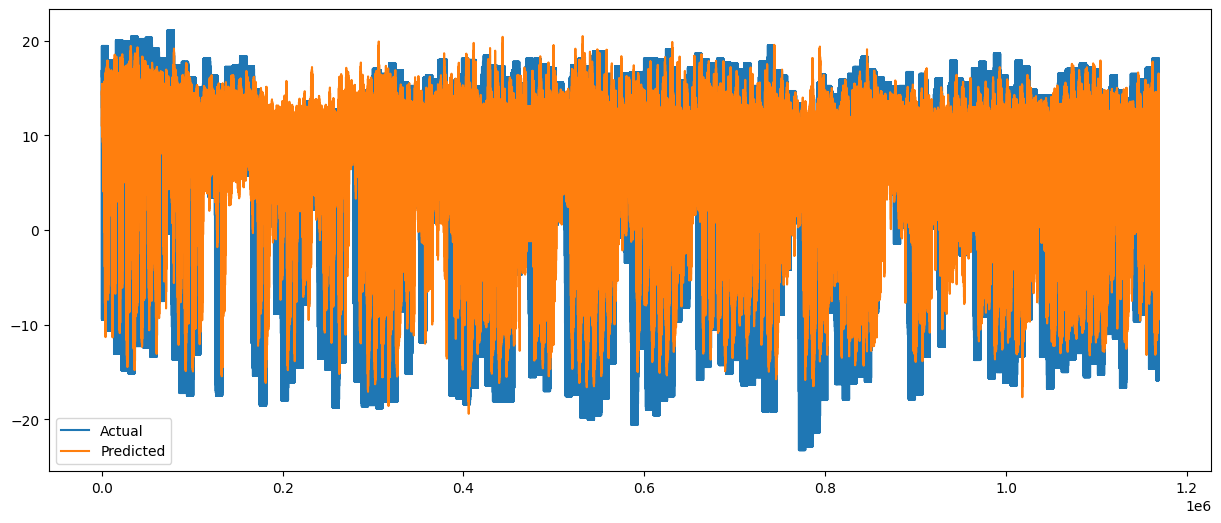

In [12]:
def main():
    # Load the data
    file_path = "time-series-forecasting-datasets/ETTm1.csv"
    data = load_data(file_path)
    
    # Preprocess the data
    data_scaled, scaler = preprocess_data(data)
    
    # Define input and output lengths
    input_length = 24  # Full day (24 hours)
    output_length = 84  # Full week in 2-hour intervals (7 days * 12 intervals per day)
    
    # Create sequences
    X, y = create_sqs(data_scaled, input_length, output_length)
    
    # Split the data
    X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2)
    
    # Build the model
    num_features = data.shape[1]  # Number of features in the dataset
    model = build_model(input_length, output_length, num_features)
    
    # Train the model
    train_model(model, X_train, y_train, X_test, y_test, epochs=20)
    
    # Evaluate the model
    y_test_actual, y_pred_actual = evaluate_model(model, X_test, y_test, scaler)
    
    # Visualize the results
    plot_results(y_test_actual, y_pred_actual)

if __name__ == "__main__":
    main()